### k-NN Algorithm

k-NN algorithm is a non-parametric algorithm that exploits the
geometry / vector space of data points (D- dimensions and N- data
                                        points).

"Training" $k$-NN methods is somewhat different from training
e.g. regression models, as the results are not concentrated into
certain parameters.  A "trained" $k$-NN is just the training data.
This is called _instance-based learning_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
df_iris_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df_iris_target = pd.DataFrame(iris_data.target, columns=['target'])

In [5]:
df_iris_data.shape

(150, 4)

In [6]:
X = iris_data.data[:,:2]
print("looking at variables:", iris_data.feature_names[:2])
y = iris_data.target

looking at variables: ['sepal length (cm)', 'sepal width (cm)']


In [7]:
n = 5
p = 1

In [8]:
from sklearn.neighbors import KNeighborsClassifier
iris_clf = KNeighborsClassifier(n_neighbors=n,p=p)
iris_clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

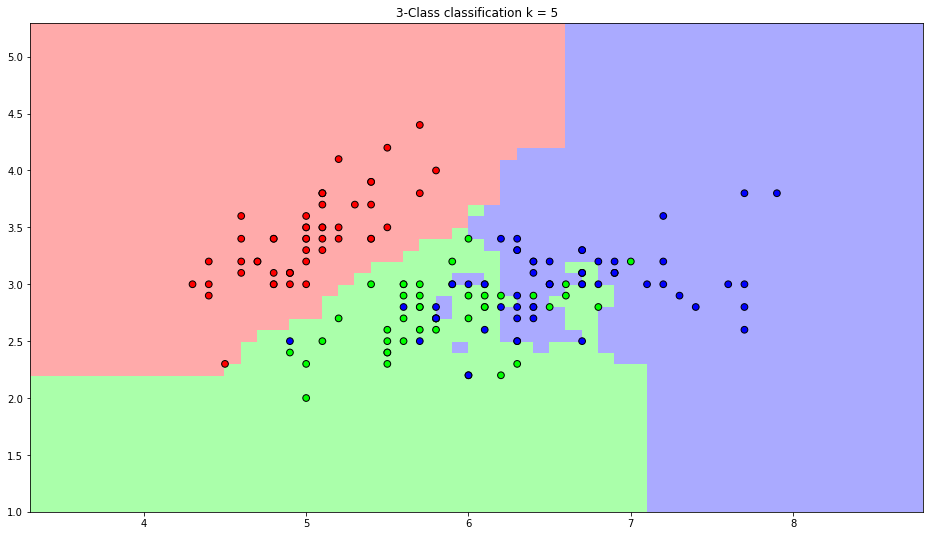

In [9]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = iris_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
iris_preds = iris_clf.predict(X)
accuracy_score(iris_preds,iris_data.target)

0.83333333333333337

#### Working with Wine data

In [11]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [12]:
print(wine_data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [13]:
df_wine_data = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
print(df_wine_data.head())
print(wine_data.target[:10])
print(df_wine_data.shape)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

#### Scaling 

Interesting article on medium: [Link](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)

Observe the Y-axis before scaling

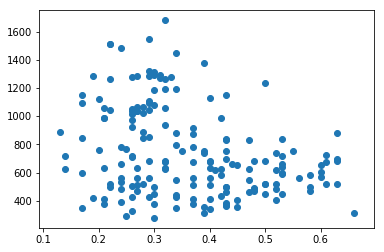

In [14]:
plt.scatter(df_wine_data.nonflavanoid_phenols,df_wine_data.proline)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_wine_data)
scaled_wine_data = pd.DataFrame(scaler.transform(df_wine_data),columns=wine_data.feature_names)

After scaling

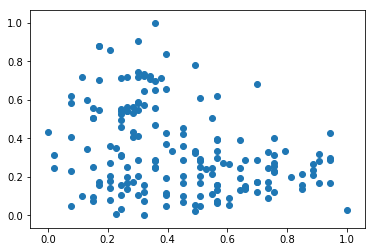

In [16]:
plt.scatter(scaled_wine_data.nonflavanoid_phenols,scaled_wine_data.proline)

#### Distance metrics

sklearn module [Link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [17]:
n = 5

Text(0.5,1,'3-Class classification k = 5')

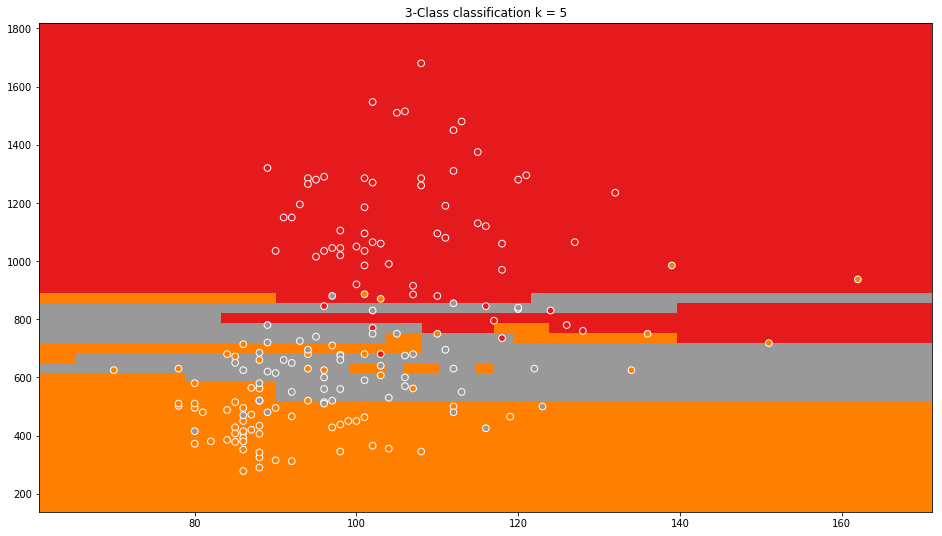

In [18]:
X = df_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2)
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

Text(0.5,1,'3-Class classification k = 5')

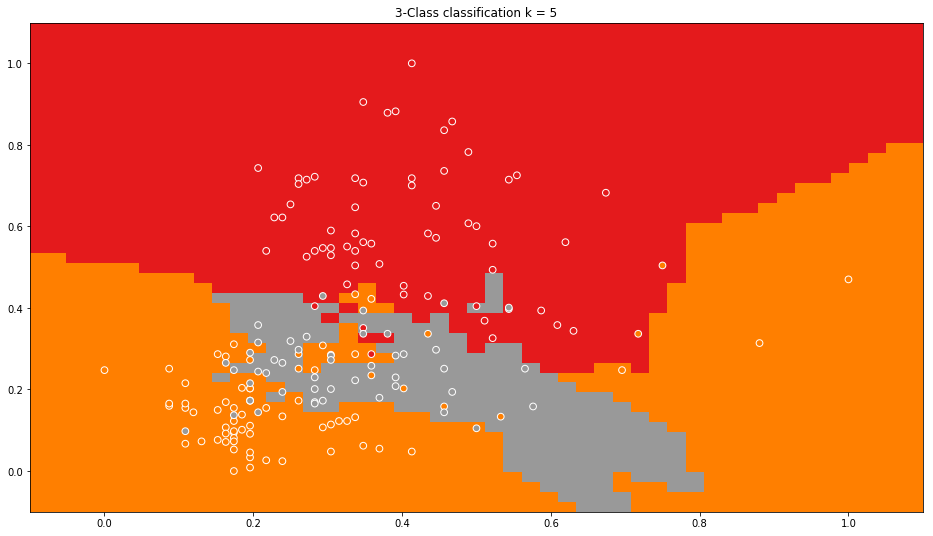

In [19]:
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2)
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

In [20]:
wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

0.7921348314606742

[[  1.54886339e-02  -1.22035863e+01]
 [ -1.22035863e+01   9.91667174e+04]]


Text(0.5,1,'3-Class classification k = 5')

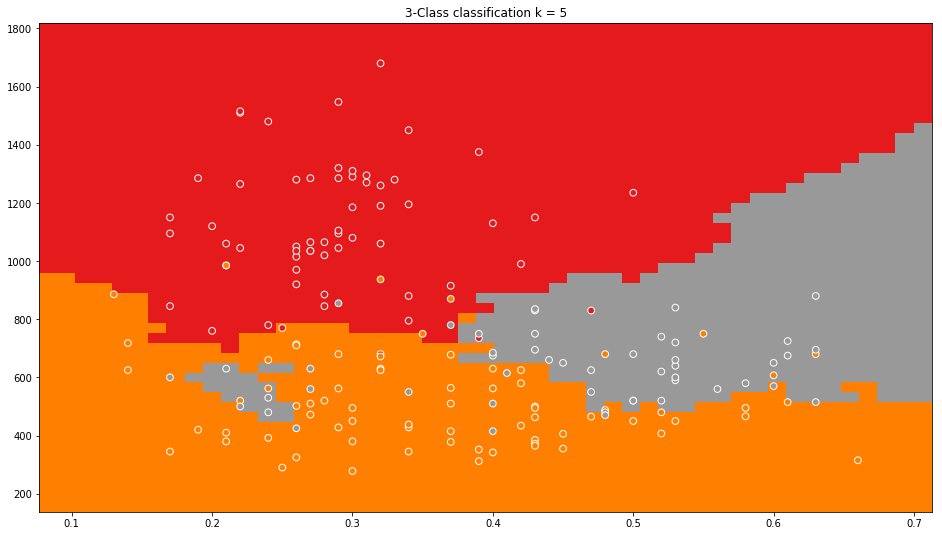

In [21]:
n = 5
X = df_wine_data[['nonflavanoid_phenols', 'proline']].as_matrix()
y = wine_data.target

V = np.cov(X.T)
print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=1,
                              metric='mahalanobis', metric_params =
                              {'V': V})
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

In [22]:
wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

0.8258426966292135

#### Tune the parameters of distance metrics, number of neighbors and report results of your experiments in a dataframe

In [23]:
results = pd.DataFrame(columns =['dataset','is_scaled','distance_metrics','neighbours','accuracy'])

In [24]:
#scaling iris data

X = iris_data.data[:,:4]
print("looking at variables:", iris_data.feature_names[:4])
y = iris_data.target

looking at variables: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
n = 4
p = 2
iris_clf_2 = KNeighborsClassifier(n_neighbors=n, p=p)
iris_clf_2.fit(X, y)
yhat_2 = iris_clf_2.predict(X)

In [26]:
accuracy_score(yhat_2, y)*100

96.0

In [27]:
list_results = list()
dict_results = {'dataset':'iris_data','is_scaled':'No','distance_metrics':'Euclidean','neighbours':4,'accuracy':96}
list_results.append(dict_results)


In [28]:
n=10
p=2
iris_clf_3 = KNeighborsClassifier(n_neighbors=n, p=p)
iris_clf_3.fit(X,y)
yhat_3 = iris_clf_3.predict(X)
accuracy_score(yhat_3, y)*100

98.0

In [29]:
dict_results = {'dataset':'iris_data','is_scaled':'No','distance_metrics':'Euclidean','neighbours':10,'accuracy':98}
list_results.append(dict_results)

In [30]:
n=5
p=3
iris_clf_4 = KNeighborsClassifier(n_neighbors=n, p=p)
iris_clf_4.fit(X,y)
yhat_4 = iris_clf_4.predict(X)
accuracy_score(yhat_4, y)*100

96.666666666666671

In [31]:
dict_results = {'dataset':'iris_data','is_scaled':'No','distance_metrics':'Minkowski','neighbours':5,'accuracy':96.67}
list_results.append(dict_results)

In [32]:
X = df_wine_data[['magnesium', 'proline', 'total_phenols']].as_matrix()
y = wine_data.target
n=4
p=2
#V = np.cov(X.T)
#print(V)
winecl_2 = KNeighborsClassifier(n_neighbors=n, p=2)
winecl_2.fit(X, y)
yhat_2=winecl_2.predict(X)
accuracy_score(yhat_2, y)*100

79.775280898876403

In [33]:
dict_results = {'dataset':'wine_data','is_scaled':'No','distance_metrics':'Minkowski','neighbours':4,'accuracy':79.77}
list_results.append(dict_results)

In [34]:
n=5
p=3
iris_clf_4 = KNeighborsClassifier(n_neighbors=n, p=p)
iris_clf_4.fit(X,y)
yhat_4 = iris_clf_4.predict(X)
accuracy_score(yhat_4, y)*100

76.966292134831463

In [35]:
X = scaled_wine_data[['magnesium', 'proline','total_phenols']].as_matrix()
y = wine_data.target

In [36]:
n=10
p=2
wine2 = KNeighborsClassifier(n_neighbors=n, p=p)
wine2.fit(X, y)
yhat = wine2.predict(X)
accuracy_score(yhat,y)*100

85.393258426966284

In [37]:
dict_results = {'dataset':'wine_data','is_scaled':'Yes','distance_metrics':'Euclidean','neighbours':10,'accuracy':85.39}
list_results.append(dict_results)

In [38]:
n=5
p=1
wine3 = KNeighborsClassifier(n_neighbors=n, p=p)
wine3.fit(X, y)
yhat = wine3.predict(X)
accuracy_score(yhat,y)*100

87.078651685393254

In [39]:
dict_results = {'dataset':'wine_data','is_scaled':'Yes','distance_metrics':'Manhattan','neighbours':5,'accuracy':88.76}
list_results.append(dict_results)

In [40]:
results = pd.DataFrame(list_results)
results

,accuracy,dataset,distance_metrics,is_scaled,neighbours
0,96.00,iris_data,Euclidean,No,4
1,98.00,iris_data,Euclidean,No,10
2,96.67,iris_data,Minkowski,No,5
3,79.77,wine_data,Minkowski,No,4
4,85.39,wine_data,Euclidean,Yes,10
5,88.76,wine_data,Manhattan,Yes,5
